Sample Dataset:
   Size_sqft  Num_Rooms  Age_Years   Price
0       3674          1         16  421255
1       1360          5         29  194158
2       1794          5         16  250800
3       1630          2         25  203151
4       1595          5         19  221654

Model Evaluation:
MAE: 12119.003435088645
MSE: 170964362.96365768
R² Score: 0.9855071266826282

Coefficients:
     Feature   Coefficient
0  Size_sqft    101.352849
1  Num_Rooms  10081.450094
2  Age_Years  -1072.958003


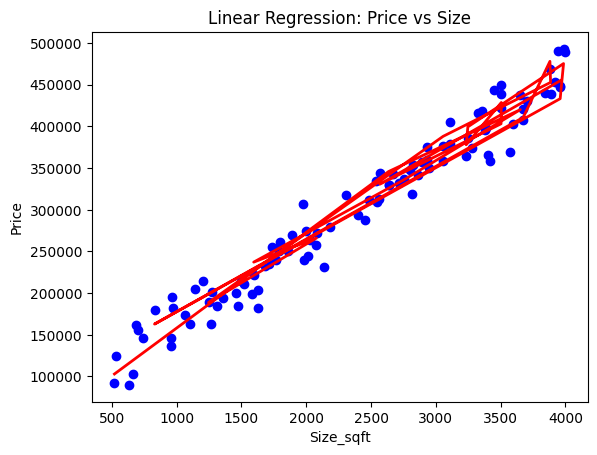

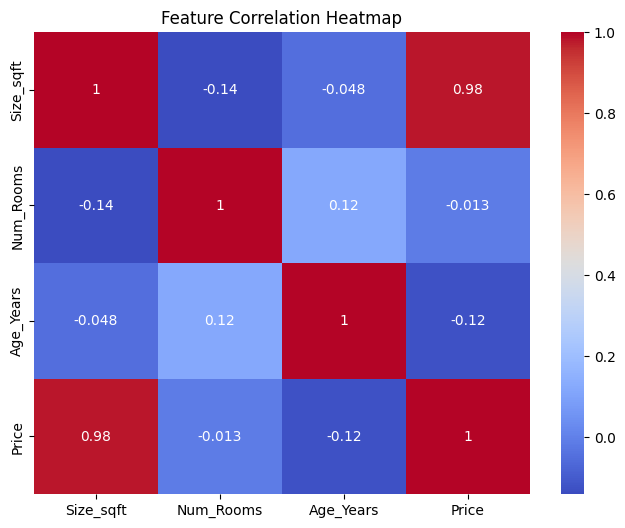

In [3]:
# ===============================
# Task3_Linear_Regression.ipynb
# Self-contained example
# ===============================

# ------------------------------
# Step 1: Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ------------------------------
# Step 2: Create Sample Dataset
# ------------------------------
# Example: Predict house price from size (sqft) and number of rooms
np.random.seed(42)

data_size = 100
df = pd.DataFrame({
    'Size_sqft': np.random.randint(500, 4000, size=data_size),
    'Num_Rooms': np.random.randint(1, 6, size=data_size),
    'Age_Years': np.random.randint(0, 30, size=data_size)
})

# Generate a target with some randomness
df['Price'] = 50000 + df['Size_sqft']*100 + df['Num_Rooms']*10000 - df['Age_Years']*1000 + np.random.randint(-20000, 20000, size=data_size)

print("Sample Dataset:")
print(df.head())

# ------------------------------
# Step 3: Preprocessing
# ------------------------------
X = df[['Size_sqft', 'Num_Rooms', 'Age_Years']]
y = df['Price']

# ------------------------------
# Step 4: Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# Step 5: Fit Linear Regression
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ------------------------------
# Step 6: Evaluate Model
# ------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

# ------------------------------
# Step 7: Coefficients
# ------------------------------
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nCoefficients:")
print(coeff_df)

# ------------------------------
# Step 8: Plot
# ------------------------------
# Plot Price vs Size_sqft
plt.scatter(df['Size_sqft'], df['Price'], color='blue')
plt.plot(X_test['Size_sqft'], y_pred, color='red', linewidth=2)
plt.xlabel('Size_sqft')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Size')
os.makedirs('outputs/figures', exist_ok=True)
plt.savefig('outputs/figures/price_vs_size.png')
plt.show()

# Correlation heatmap for all features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('outputs/figures/correlation_heatmap.png')
plt.show()
